In [1]:
## Part I: DNA processing 
#1  
DNA1 = 'CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC'
DNA2 = 'GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC'

print("DNA1 is: ", DNA1)
print("DNA2 is: ", DNA2) 

DNA1 is:  CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC
DNA2 is:  GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC


In [2]:
#2 
DNA1_length = len(DNA1)
DNA2_length = len(DNA2)

print("Length of DNA1_length: ", DNA1_length)
print("Length of DNA2_length: ", DNA2_length)

Length of DNA1_length:  66
Length of DNA2_length:  65


In [ ]:
#3
print(DNA1[:10])

CCAGGGGAGG


In [ ]:
print(DNA2[:10])

GCGGCGGGGA


In [ ]:
print(DNA1[-10:])

GGGCGACGGC


In [ ]:
print(DNA2[-10:])

AGAGGAGCGC


In [ ]:
DNA1[-3:] == DNA2[-3:]

False

In [ ]:
DNA1_DNA2 = DNA1[-5:]+DNA2[-5:]
print(DNA1_DNA2)

ACGGCAGCGC


In [ ]:
print(DNA1.count('A'))

15


In [ ]:
print(DNA2.count('A'))

14


In [ ]:
#4 
DNA_motifs = ['TTCAT','AATCATGA','CCCG','GGCATT','CACGT']
print("DNA_motifs: ", DNA_motifs)

DNA_motifs:  ['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT']


In [ ]:
DNA_motifs[2]

'CCCG'

In [ ]:
DNA_motifs[:2]

['TTCAT', 'AATCATGA']

In [ ]:
DNA_motifs[-2:]

['GGCATT', 'CACGT']

In [ ]:
#5 
DNA_motifs_length = {'TTCAT':5,'AATCATGA':8,'CCCG':4,'GGCATT':6,'CACGT':5}
print("DNA_motifs_length : ", DNA_motifs_length)

DNA_motifs_length :  {'TTCAT': 5, 'AATCATGA': 8, 'CCCG': 4, 'GGCATT': 6, 'CACGT': 5}


In [ ]:
DNA_motifs_length['CAAT'] = len('CAAT')
print("DNA_motifs_length: ", DNA_motifs_length)

DNA_motifs_length:  {'TTCAT': 5, 'AATCATGA': 8, 'CCCG': 4, 'GGCATT': 6, 'CACGT': 5, 'CAAT': 4}


In [ ]:
print(DNA_motifs_length.keys())

dict_keys(['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT', 'CAAT'])


In [ ]:
print(DNA_motifs_length.values())

dict_values([5, 8, 4, 6, 5, 4])


In [ ]:
print(DNA_motifs_length.items())

dict_items([('TTCAT', 5), ('AATCATGA', 8), ('CCCG', 4), ('GGCATT', 6), ('CACGT', 5), ('CAAT', 4)])


In [ ]:
'CCT' in DNA_motifs_length

False

In [ ]:
#6
DNA_motifs=['TTCAT','AATCATGA','CCCG','GGCATT','CACGT']
print("DNA_motifs:",DNA_motifs)

DNA_motifs: ['TTCAT', 'AATCATGA', 'CCCG', 'GGCATT', 'CACGT']


In [ ]:
for motif in DNA_motifs:
  print("Length of", motif, "is", len(motif))

Length of TTCAT is 5
Length of AATCATGA is 8
Length of CCCG is 4
Length of GGCATT is 6
Length of CACGT is 5


In [ ]:
for motif in DNA_motifs:
  if len(motif)>5:
    print(motif)

AATCATGA
GGCATT


In [ ]:
#7
def find_maximum_value(input):
  maximum_number = float('-inf')
  for num in input: 
    if num > maximum_number:
        maximum_number = num
  return maximum_number

In [ ]:
sample_list = [5,3,2,1]
find_maximum_value(sample_list)

5

In [ ]:
def find_minimum_value(input): 
  minimum_number = float('inf')
  for num in input: 
    if num < minimum_number: 
      minimum_number = num
  return minimum_number

In [ ]:
sample_list = [5,3,2,1]
find_minimum_value(sample_list)

1

In [ ]:
def sum_of_list(input):
  sum_elements = 0
  for num in input: 
    sum_elements = sum_elements + num 
  return sum_elements

In [ ]:
sample_list = [5,3,2,1]
sum_of_list(sample_list)

11

In [ ]:
##Part II
#8
################################################################################################
# Needleman-Wunsch Global Pairwise Alignment algorithm
################################################################################################

def buildTable(X, Y, match=1, mismatch=-1, gap=-1):
    print("Sequence 1:", X)
    print("Sequence 2:", Y)
    # create table of zeros with dimension (1+|X|)-by-(1+|Y|)
    # X: vertical,  Y:horizontal
    opt = []
    for i in range(1+len(X)):
      row = []
      for j in range(1+len(Y)):
        row.append(0)
      opt.append(row)
    
    # print out the initial table
    #print("The intial alignment table is:")
    #for row in opt:
    #      print(' '.join('%3d' % val for val in row))

    for j in range(1,1+len(X)):
        opt[j][0] = opt[j-1][0] + gap       # initialize left column
    for k in range(1,1+len(Y)):
        opt[0][k] = opt[0][k-1] + gap       # initialize top row
    
    # calculate the score for each possible alignment
    for j in range(1,1+len(X)):
        for k in range(1, 1+len(Y)):
          if X[j-1] == Y[k-1]:  # sequence start with 0
            option1 = opt[j-1][k-1] + match  # align chars, match
          else:
            option1 = opt[j-1][k-1] + mismatch  # align chars, mismatch
          option2 = opt[j-1][k] + gap                     # last of X with gap
          option3 = opt[j][k-1] + gap                     # last of Y with gap
          opt[j][k] = max(option1, option2, option3)
    
    return opt


def TraceBack(X, Y, table, match=1, mismatch=-1, gap=-1):
    first = ''        # alignment for X
    second = ''       # alignment for Y
    glue = ''         # line showing matches/mismatches

    # start reconstruction at bottom-right of table
    j = len(X)
    k = len(Y)
    
    while j>0 or k>0:
        if j>0 and k>0 and ((X[j-1] == Y[k-1] and table[j][k] == table[j-1][k-1] + match) or (X[j-1] != Y[k-1] and table[j][k] == table[j-1][k-1] + mismatch)):
            # option1 above; match X[j-1] with Y[k-1]
            first =  X[j-1] + first
            second = Y[k-1] + second
            if X[j-1] == Y[k-1] and table[j][k] == table[j-1][k-1] + match:
              glue = '|' + glue   # designate match
            elif X[j-1] != Y[k-1] and table[j][k] == table[j-1][k-1] + mismatch:
              glue = '.' + glue   # designate mismatch
            j = j-1
            k = k-1
        elif j > 0 and table[j][k] == table[j-1][k] + gap:
            # option1 above; match X[j-1] with a gap in Y
            first  = X[j-1] + first
            second = '-' + second
            glue   = ' ' + glue
            j = j-1
        elif k > 0 and table[j][k] == table[j][k-1] + gap:
            # option2 above; match gap in X with Y[k-1]
            first  = '-'  + first
            second = Y[k-1] + second
            glue   = ' '  + glue
            k = k-1
    print("The best alignment is:")
    print(first)
    print(glue)
    print(second)
    print("The score of optimal alignment is: ",table[len(X)][len(Y)])
    return first,glue,second

In [ ]:
table = buildTable(DNA1, DNA2, match=1, mismatch=-1, gap=-1)
TraceBack(DNA1, DNA2, table,match=1, mismatch=-1, gap=-1)

Sequence 1: CCAGGGGAGGTTCCTGAACAACACGGAGCTGCAGGCGGCGAACGGGAGGTTCCAGAGGGCGACGGC
Sequence 2: GCGGCGGGGAGGTTCCCGAGCGGGAGCGACCTGGAGAGCGTGCAGGGGAACATACAGAGGAGCGC
The best alignment is:
-C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC
 |  | |||||||||||.||.|...| | ||.|||.|| ||| ||  |.||||...|.|||| ||.| | ||
GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC
The score of optimal alignment is:  20


('-C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC',
 ' |  | |||||||||||.||.|...| | ||.|||.|| ||| ||  |.||||...|.|||| ||.| | ||',
 'GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC')

In [ ]:
## Global Alignment score is 20 

In [ ]:
DNA1_aln,glue,DNA2_aln = TraceBack(DNA1, DNA2, table,match=1, mismatch=-1, gap=-1)
print("DNA1_alignment: ", DNA1_aln)
print("DNA2_alignment: ", DNA2_aln)

The best alignment is:
-C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC
 |  | |||||||||||.||.|...| | ||.|||.|| ||| ||  |.||||...|.|||| ||.| | ||
GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC
The score of optimal alignment is:  20
DNA1_alignment:  -C--CAGGGGAGGTTCCTGAACAACA-CGGAGCTGCAG-GCG-GCGAACGGGAGGTTCCAGAGGGCGACGGC
DNA2_alignment:  GCGGC-GGGGAGGTTCCCGAGCGGGAGC-GACCTGGAGAGCGTGC--AGGGGAACATACAGA-GGAG-C-GC


In [ ]:
## Part III 
#9 
####################################################################################### 
# a dictionary to translate three-letter mRNA to three-letter amino acid here 
#######################################################################################

translate = { 
  'UUU':'Phe','UCU':'Ser','UAU':'Tyr','UGU':'Cys',
  'UUC':'Phe','UCC':'Ser','UAC':'Tyr','UGC':'Cys',
  'UUA':'Leu','UCA':'Ser','UAA':'Stop','UGA':'Stop',
  'UUG':'Leu','UCG':'Ser','UAG':'Stop','UGG':'Trp',
  'CUU':'Leu','CCU':'Pro','CAU':'His','CGU':'Arg',
  'CUC':'Leu','CCC':'Pro','CAC':'His','CGC':'Arg',
  'CUA':'Leu','CCA':'Pro','CAA':'Gln','CGA':'Arg',
  'CUG':'Leu','CCG':'Pro','CAG':'Gln','CGG':'Arg',
  'AUU':'Ile','ACU':'Thr','AAU':'Asn','AGU':'Ser',
  'AUC':'Ile','ACC':'Thr','AAC':'Asn','AGC':'Ser',
  'AUA':'Ile','ACA':'Thr','AAA':'Lys','AGA':'Arg',
  'AUG':'Met','ACG':'Thr','AAG':'Lys','AGG':'Arg',
  'GUU':'Val','GCU':'Ala','GAU':'Asp','GGU':'Gly',
  'GUC':'Val','GCC':'Ala','GAC':'Asp','GGC':'Gly',
  'GUA':'Val','GCA':'Ala','GAA':'Glu','GGA':'Gly',
  'GUG':'Val','GCG':'Ala','GAG':'Glu','GGG':'Gly'
}

In [ ]:
#######################################################################################
# a dictionary to map three-letter amino acid to one-letter amino acid here
#######################################################################################

AA_mapping = {
    'Ala':'A', 'Arg':'R','Asn':'N',
    'Asp':'D', 'Cys':'C','Gln':'Q',
    'Glu':'E', 'Gly':'G','His':'H',
    'Ile':'I', 'Leu':'L','Lys':'K',
    'Met':'M', 'Phe':'F','Pro':'P',
    'Ser':'S', 'Thr':'T','Trp':'W',
    'Tyr':'Y','Val':'V'
}

In [ ]:
#######################################################################################
# This is the function to get protein sequence from DNA sequence
# The input is any DNA sequence.
# The return type should be the protein sequence translated from DNA sequence.
#######################################################################################

def get_protein_from_DNA(DNA):
  protein = ''
  RNA_seq = DNA.replace('T', 'U')

  ### Define location of start codon (AUG)
  start_codon = RNA_seq.find('AUG')
  mRNA = []
  for i in range(start_codon, len(RNA_seq), 3): 
    codon = RNA_seq[i:i + 3]
    if len(codon)==3:
        mRNA.append(codon)
  for codon in mRNA:
    if codon == 'UAA' or  codon == 'UAG' or  codon == 'UGA':
      break
    protein = protein + AA_mapping[translate[codon]]
  return (protein)

In [ ]:
print('DNA1_protein_seq: ', get_protein_from_DNA(DNA1))
print('DNA2_protein_seq: ', get_protein_from_DNA(DNA2))

DNA1_protein_seq:  RGGS
DNA2_protein_seq:  GGEVPERERPGERAGEHTEER


In [ ]:
## Part IV
#10 
Tree = ('A',('B',(),()),('C',('G',(),()),('D',('E',(),()),('F',(),()))))

In [ ]:
## Part V 
#11
rna_seq = 'GGGCAAUCCUCUUCGGGCCC'
rna_ss =  '((((...((.....))))))'

In [ ]:
# Running VARNA (Linear layout/PNG output)
def run_varna_linear(rna_sequence, rna_dot_bracket, output_file = 'rna_linear_plot.png'):
  import subprocess
  !rm VARNAv3-93.jar
  !wget http://varna.lri.fr/bin/VARNAv3-93.jar
  subprocess.Popen(["java", "-cp","./VARNAv3-93.jar", "fr.orsay.lri.varna.applications.VARNAcmd", '-sequenceDBN', rna_sequence, '-structureDBN', rna_dot_bracket, '-o', output_file, '-algorithm', 'line', '-resolution', '8.0', '-bpStyle', 'lw'], stderr=subprocess.STDOUT, stdout=subprocess.PIPE).communicate()[0]

In [ ]:
# Visualize the figure 
def visualize_figure(figure_file, fig_size = (1000,600)):
  # Display in jupyter notebook
  from PIL import Image
  im = Image.open(figure_file)
  im1 = im.resize(fig_size) 
  # Shows the image in image viewer  
  im1
  return im1


In [ ]:
run_varna_linear(rna_seq,rna_ss,output_file = 'rna_linear_plot_1.png')

--2020-12-03 16:54:18--  http://varna.lri.fr/bin/VARNAv3-93.jar
Resolving varna.lri.fr (varna.lri.fr)... 129.175.15.21
Connecting to varna.lri.fr (varna.lri.fr)|129.175.15.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695802 (679K) [application/java-archive]
Saving to: ‘VARNAv3-93.jar’

VARNAv3-93.jar      100%[===================>] 679.49K  1.44MB/s    in 0.5s    

2020-12-03 16:54:20 (1.44 MB/s) - ‘VARNAv3-93.jar’ saved [695802/695802]



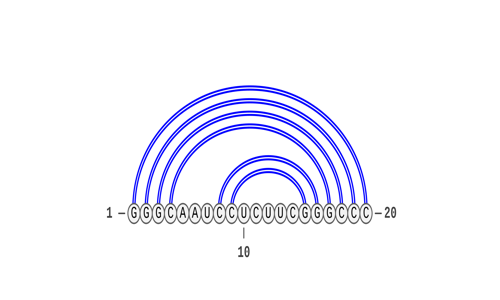

In [ ]:
visualize_figure('rna_linear_plot_1.png', fig_size = (500,300))